<a href="https://colab.research.google.com/github/unica-ml/ml/blob/master/notebooks/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bayesian and minimum-risk decision regions

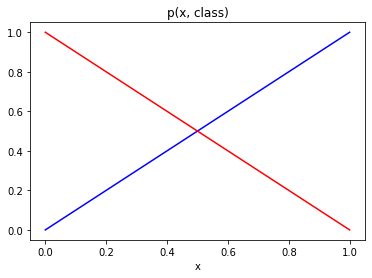

In [56]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1, num=999)

prior0 = 1/2
prior1 = 1-prior0

likelihood0 = 2*x
likelihood1 = 2-2*x

plt.plot(x, likelihood0*prior0, 'b', )
plt.plot(x, likelihood1*prior1, 'r')
plt.xlabel('x')
plt.title('p(x, class)')
plt.show()


Find the optimal Bayesian threshold, i.e., the value(s) of $x$ for which $p(x, \omega_0) = p(x, \omega_1)$.

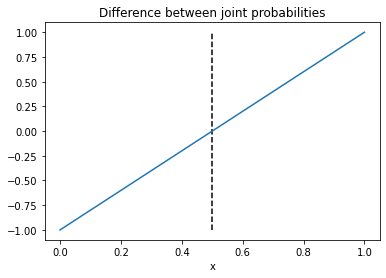

Optimal threshold(s):  [0.5]


In [57]:
# to this end, we compute the difference of the joint probabilities
# and look for zero crossings
def zero_crossings(delta):
    signed_diff = np.diff(np.sign(delta))
    zero_crossings = np.where(signed_diff)[0]  # index of non-null elements
    x_star = x[zero_crossings]
    return x_star


delta = likelihood0*prior0 - likelihood1*prior1
x_star = zero_crossings(delta)
plt.plot(x, delta)
plt.vlines(x_star, ymin=np.min(delta), ymax=np.max(delta), 
           colors='k', linestyles='--')
plt.title('Difference between joint probabilities')
plt.xlabel('x')
plt.show()

print("Optimal threshold(s): ", x_star)

Now, let's compute the Bayesian error.

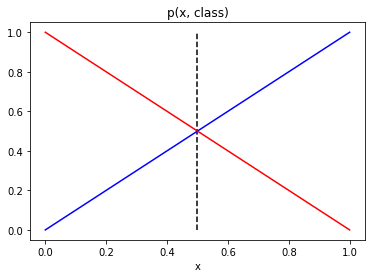

Bayesian error is:  0.24949950000200805
Error on class 0:  0.12499999999999997
Error on class 1:  0.12449950000200806


In [58]:
plt.plot(x, likelihood0*prior0, 'b', )
plt.plot(x, likelihood1*prior1, 'r')
plt.xlabel('x')
plt.title('p(x, class)')
plt.vlines(x_star, ymin=0, ymax=1, 
           colors='k', linestyles='--')
plt.show()

# we have to integrate the joint p0 from 0 to 0.5, and p1 from 0.5 to 1
# numerical integration via sampling from p(x,class), or  analytical integration
p0=likelihood0*prior0
p1=likelihood1*prior1

r0 = x < 0.5
r1 = x >= 0.5 

error = np.trapz(p0[r0], x[r0]) + np.trapz(p1[r1], x[r1])
print("Bayesian error is: ", error)

print("Error on class 0: ", np.trapz(p0[r0], x[r0]))
print("Error on class 1: ", np.trapz(p1[r1], x[r1]))
